 #78=IfcAlignment('3FaFf7DSXBn8qqoGjdzleF',$,'Dummy',$,$,#77,#90,$)
   #71=IfcAlignmentHorizontal('3orcAtNUv2a9oTgW$HObBK',$,'Dummy - Horizontal',$,$,$,$)
     #11=IfcAlignmentSegment('2L1E4m9CbAwhnVM6gthnRP',$,'H1',$,$,#77,#92,#10)
     #21=IfcAlignmentSegment('2XCmZsHYbA1grAHRGpYYOH',$,'H2',$,$,#77,#94,#20)
   #73=IfcAlignmentVertical('1ZaHdry0T8tfHumaF_niNi',$,'Dummy - Vertical',$,$,$,$)
     #31=IfcAlignmentSegment('1cnkbkXtrDiPbI9gG5jGm9',$,'V1',$,$,#77,#96,#30)
     #41=IfcAlignmentSegment('1RfIYMBG1528esL7FagSP4',$,'V2',$,$,#77,#98,#40)
     #51=IfcAlignmentSegment('0wXzpPynjAeekDD8Vr6QY$',$,'V3',$,$,#77,#100,#50)
     #61=IfcAlignmentSegment('15IfWIExrCMwooGt6OEEhr',$,'V4',$,$,#77,#102,#60)
   #82=IfcReferent('36PWzWkojAOhZ4fAm0QuVp',$,'Start Station (10+00.00)',$,$,#81,$,.STATION.)
#29=IfcCompositeCurve((#18,#28),.F.)
#70=IfcGradientCurve((#39,#49,#59,#69),.F.,#29,$)
[[  1.   0.   0.   0.]
 [  0.   1.   0.   0.]
 [  0.   0.   1.   0.]
 [100.   0.   0.   1.]]
[[  0.8     0.    

TypeError: unsupported operand type(s) for /: 'entity_instance' and 'float'

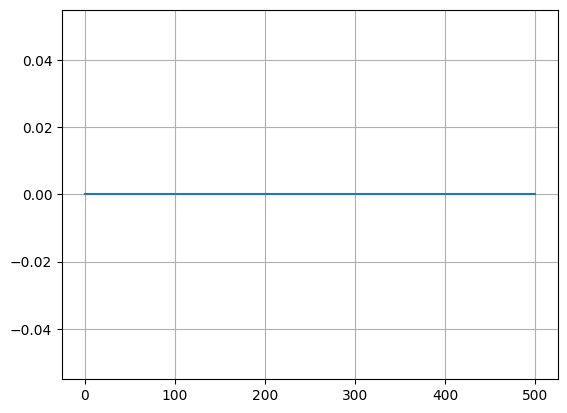

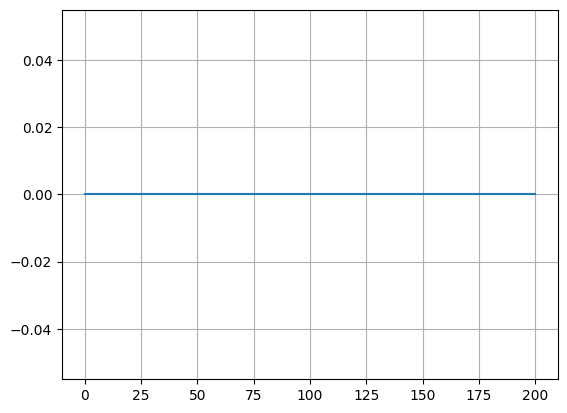

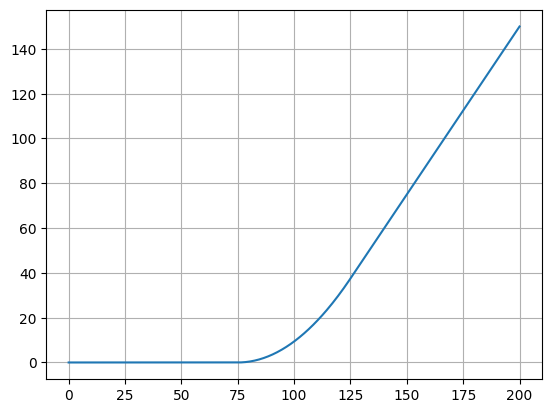

In [14]:
import ifcopenshell
import ifcopenshell.api
from ifcopenshell.api import run
import ifcopenshell.alignment
import numpy as np
import matplotlib.pyplot as plt

model = ifcopenshell.file(schema="IFC4X3_ADD2")

project = run("root.create_entity", model, ifc_class="IfcProject", name="Dummy")

geometric_representation_context = run("context.add_context",model,context_type="Model")
axis_model_representation_subcontext = model.createIfcGeometricRepresentationSubContext(
    ContextIdentifier="Axis",
    ContextType="Model",
    ParentContext=geometric_representation_context,
    TargetView="MODEL_VIEW")

fig1 = plt.figure().add_subplot()
fig2 = plt.figure().add_subplot()
fig3 = plt.figure().add_subplot()
fig1.grid(True)
fig2.grid(True)
fig3.grid(True)
#fig2.axis("square")

coordinates = [(0.0,0.0),(500.0,0.0)]
radii = []
vpoints = [(0.0,0.0),(100.0,0.0),(200.0,150.0)]
lengths = [(50.)]

#coordinates = [(500.,2500.),(3340.0,  660.0),(4340.0, 5000.0),(7600.0, 4560.0),(8480.0, 2010.0)]
#radii = [(1000.),(1250.),(950.)]
#vpoints = [(0.0,100.0),(2000.,135.0),(5000.,105.),(7400.,153.),(9800.,105.),(12800.,90.)]
#lengths = [(1600.),(1200.),(2000.),(800.)]

helper = ifcopenshell.alignment.IfcAlignmentHelper(model)
alignment = helper.create_alignment_by_pi_method("Dummy",coordinates,radii,vpoints,lengths)
ifcopenshell.alignment.print_structure(alignment)
cc = alignment.Representation.Representations[0].Items[0]
gc = alignment.Representation.Representations[1].Items[0]
print(cc)
print(gc)
s = ifcopenshell.geom.settings()

shape = ifcopenshell.geom.create_shape(s,cc)
verts = shape.verts
verts = np.array(verts).reshape((-1,3))
x,y,z = verts.T
fig1.plot(x,y)

evaluator = ifcopenshell.ifcopenshell_wrapper.function_item_evaluator(s,ifcopenshell.ifcopenshell_wrapper.map_shape(s,gc.wrapped_data))
results = evaluator.evaluate()

distances = evaluator.evaluation_points()
shape = ifcopenshell.geom.create_shape(s,gc)
verts = shape.verts
verts = np.array(verts).reshape((-1,3))
x,y,z = verts.T
fig2.plot(x,y)
fig3.plot(distances,z)

print(ifcopenshell.alignment.evaluate_representation(cc,100.0))
print(ifcopenshell.alignment.evaluate_representation(gc,100.0))
for segment in cc.Segments:
    l = segment.SegmentLength
    print(l)
    print(ifcopenshell.alignment.evaluate_segment(segment,l/2.))

model.write("C:/Users/bricer/OneDrive - Washington State Department of Transportation/Desktop/Test.ifc")